In [22]:
import numpy as np 
import cv2
import os 
from tensorflow.keras.layers import Dense , UpSampling2D , MaxPooling2D, Input ,Conv2D
from tensorflow.keras.models import Model 
from tensorflow.keras.datasets import mnist


In [23]:
(x_train , x_test), (y_train , y_test) = mnist.load_data()

In [24]:
x_train = x_train/255.0
x_test = y_train/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [25]:
# reshaping the data to pass it to cnn and adding the channels
x_train = x_train.reshape(x_train.shape[0],28 , 28 ,1)
x_test = x_test.reshape(x_test.shape[0],28 , 28 ,1)
x_test.shape

(10000, 28, 28, 1)

In [26]:
input_layer = Input(shape = (28,28,1))
# encoder  => here we did downsampling
x = Conv2D(16 , (3,3) , activation= 'relu' , padding = 'same')(input_layer)
x = MaxPooling2D(pool_size = (2,2),padding = 'same')(x)
x = Conv2D(8 , (3,3) , activation= 'relu' , padding = 'same')(x)
x = MaxPooling2D(pool_size = (2,2),padding = 'same')(x)
x = Conv2D(8 , (3,3) , activation= 'relu' , padding = 'same')(x)
encoded = MaxPooling2D(pool_size = (2,2),padding = 'same')(x)

# decoder  => here is upsampling 
x = Conv2D(8 , (3,3) , activation= 'relu' , padding = 'same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8 , (3,3) , activation= 'relu' , padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16 , (3,3) , activation= 'relu' )(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1 , (3,3) , activation = 'relu' , padding = 'same')(x)


auto_encoder = Model(input_layer , decoded  ,name = 'The_Auto_Encoder')
auto_encoder.summary()

Model: "The_Auto_Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)      

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(patience = 3)
auto_encoder.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy']) 
# we here working in unsupervised learning so we passed the x_train to the model to give me the output like the input 
history=auto_encoder.fit(x_train , x_train , epochs = 20 , 
                         batch_size = 128 , 
                         validation_data = (x_test ,x_test),
                        callbacks = [callbacks])

Epoch 1/20
469/469 [==============================] - 33s 69ms/step - loss: 0.2473 - accuracy: 0.7933 - val_loss: 0.1905 - val_accuracy: 0.7926
Epoch 2/20
469/469 [==============================] - 31s 67ms/step - loss: 0.1849 - accuracy: 0.7969 - val_loss: 0.1767 - val_accuracy: 0.7967
Epoch 3/20
469/469 [==============================] - 32s 67ms/step - loss: 0.1752 - accuracy: 0.7996 - val_loss: 0.1689 - val_accuracy: 0.8038
Epoch 4/20
469/469 [==============================] - 32s 67ms/step - loss: 0.1894 - accuracy: 0.7991 - val_loss: 0.1735 - val_accuracy: 0.7967
Epoch 5/20
469/469 [==============================] - 32s 67ms/step - loss: 0.1759 - accuracy: 0.7997 - val_loss: 0.1653 - val_accuracy: 0.7978
Epoch 6/20
469/469 [==============================] - 32s 67ms/step - loss: 0.1653 - accuracy: 0.8012 - val_loss: 0.1591 - val_accuracy: 0.8004
Epoch 7/20
469/469 [==============================] - 32s 68ms/step - loss: 0.1561 - accuracy: 0.8032 - val_loss: 0.1618 - val_accuracy:

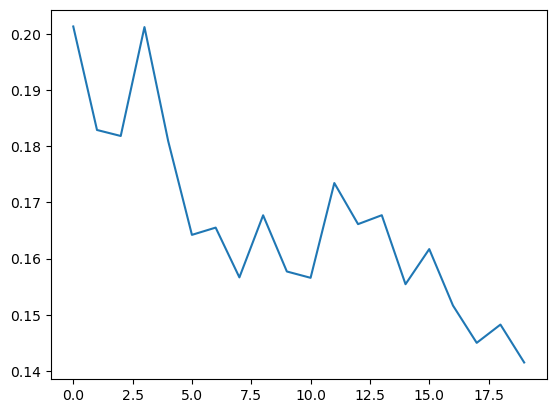

In [8]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])

In [31]:
# separate the encoder
encoder= Model(input_layer , encoded )
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584   

In [34]:
# separate the decoder
decoder_layer = Input(shape = (4,4,8))
decoder = auto_encoder.layers[7](decoder_layer)

for layer in auto_encoder.layers[8:]:
    decoder = layer(decoder)
decoder = Model(decoder_layer,decoder )
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 16, 16, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 16)        1168

In [35]:
encoded_images = encoder.predict(x_test)
encoded_images.shape

313/313 [==============================] - 1s 4ms/step


(10000, 4, 4, 8)

In [36]:
decoded_images = decoder.predict(encoded_images)
decoded_images.shape

313/313 [==============================] - 2s 8ms/step


(10000, 28, 28, 1)

In [38]:
decoded_images = decoded_images.reshape(decoded_images.shape[0],28,28)
decoded_images.shape

(10000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

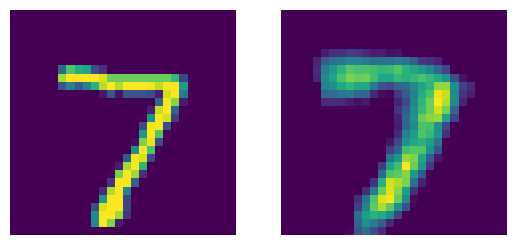

In [44]:
plt.subplot(121)
plt.imshow(x_test[0])
plt.axis('off')
plt.subplot(122)
plt.imshow(decoded_images[0])
plt.axis('off')